In [0]:
# Importing pandas and os (for using list directories)

import os
import pandas as pd

# QUESTIONS:
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisements to maximize likelihood of customer's buying product?
4. Which are the product that are most often sold together
5. What product sold the most?

In [0]:
# Specifying google drive path in which our dataset files are present

path = "/content/drive/My Drive/Colab Notebooks/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"

In [0]:
# For getting all csv files from Sales_Data folder
files = [file for file in os.listdir(path) if not file.startswith('.')]

# Creating  an empty dataframe where we can store the data of 12 months
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)

    # Here we are concating current data in all_months_data(which is an empty dataframe)
    all_months_data = pd.concat([all_months_data, current_data])

In [0]:
# Merging seperate 12 files in a single file
all_months_data.to_csv("all_data.csv", index=False)

In [8]:
# Getting our newly created file and storing it into all_data
all_data = pd.read_csv("all_data.csv")

# Printing first 5 rows
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [9]:
# Cleaning the Data
#  As we were trying to get the months data we found that there NaN values because of which we were not able to run certain commands
# Checking how many NaN we have
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# As  we see that the complete  rows are blank we will have to drop those rows
all_data = all_data.dropna(how='all') # 'all' will drop the row if the complete  row has NaN values, 'any' will drop the complete row even if it has a single NaN VALUE 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [0]:
# Now as we have to get the month integer we will try to get first two characters from 'Order Date' column
# Also we found that it has 'Or' value as dates so we have to exclude them
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [0]:
# As we have to find the best month for sales we have to multiply Quantity Ordered with Price Each

# Converting both these columns into integers as we have to multiply them
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [13]:
# Creating the 'Months' column by selecting first two characters
all_data['Month'] = all_data['Order Date'].str[0:2]

# Converting them into integer type
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


In [14]:
# We are using this for solving question 2
# Here we have to add a City column which contains City name and State name

# Getting City name
def get_city(address):
    return address.split(",")[1].strip(" ")

# Getting State name
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# Adding a new column by applying lambda function
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA)


In [0]:
# Adding a new sales column 
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [16]:
# Getting the sales per month by using groupby function
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


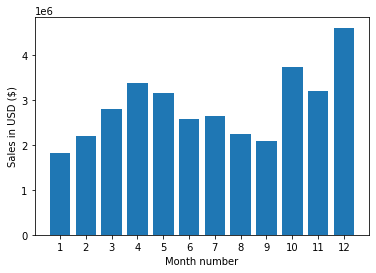

In [133]:
import matplotlib.pyplot as plt

#Bar graph of Months v Sales

results = all_data.groupby('Month').sum()
months = range(1,13)

# On Y axis we only want Sales data, hence results['Sales']

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Hence we can conclud that December month has the highest number of sales.

We have also shown the bar graph of Sales for all Months

In [35]:
# Same code as groupby months
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


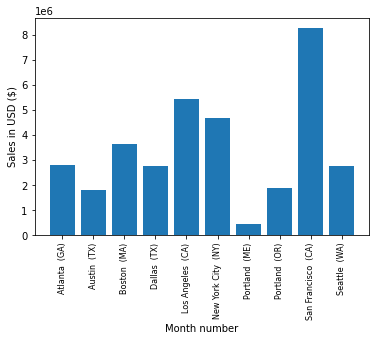

In [141]:
# Again using similar code from above - Dosen't work shows improper results, so found new code from stackoverflow

import matplotlib.pyplot as plt

# Here we are plotting a graph of City v Sales

keys = [city for city, df in all_data.groupby(['City'])]

# On Y axis we only want Sales data, hence groupby(['City']).sum()['Sales']
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

From this we conclude that San Francisco city has the highest number of sales

We have also shown bar graph of Sales per City 

In [0]:
# Converting our Order Date column to datetime object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [157]:
# Adding a new column named 'Hours'
all_data['Hour'] = all_data['Order Date'].dt.hour

# Adding a new column named 'Minutes'
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data['Count'] = 1

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,Portland (ME),700.00,1,35,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,San Francisco (CA),3.84,7,24,1
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,New York City (NY),389.99,9,46,1
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,Atlanta (GA),14.95,16,47,1
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,Seattle (WA),7.68,20,32,1


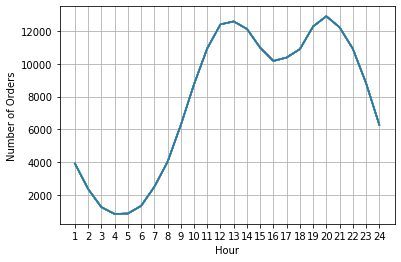

In [154]:
# Reusing the  above code
hours = [hour for hour, df in all_data.groupby(['Hour'])]

# Here we will display data using Line Chart of Hours v Number of Sales

# Displaying x-axis in proper 24 hour range
hours = range(1,25)

plt.plot(hours, all_data.groupby(['Hour']).count()) #This spicific code is shown in following code
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [156]:
# This shows how our data is grouped by Hour. Here we counted the number of rows by each hour
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


From this we conclude that 1 PM and 8 PM are best times for targeting adds to customers

In [163]:
# This will check all the rows in Order ID column and check which rows are duplicated
df = all_data[all_data['Order ID'].duplicated(keep=False)] # means keep all occurences of duplicates

# We are going to group by Order ID and specifically Product column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Only selecting 2 columns and dropping duplicates
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Displaying df
df.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count,Grouped
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),1700.00,12,38,1,"Macbook Pro Laptop,iPhone"
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,San Francisco (CA),700.00,12,38,1,"Macbook Pro Laptop,iPhone"
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),700.00,23,38,1,"iPhone,Lightning Charging Cable"
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,Seattle (WA),14.95,23,38,1,"iPhone,Lightning Charging Cable"
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,San Francisco (CA),150.00,9,35,1,"Apple Airpods Headphones,AAA Batteries (4-pack)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,151673,Wired Headphones,1,11.99,2019-02-10 21:52:00,"504 Center St, Dallas, TX 75001",2,Dallas (TX),11.99,21,52,1,"Wired Headphones,Wired Headphones"
1226,151675,Google Phone,1,600.00,2019-02-19 19:52:00,"493 4th St, Los Angeles, CA 90001",2,Los Angeles (CA),600.00,19,52,1,"Google Phone,USB-C Charging Cable"
1227,151675,USB-C Charging Cable,1,11.95,2019-02-19 19:52:00,"493 4th St, Los Angeles, CA 90001",2,Los Angeles (CA),11.95,19,52,1,"Google Phone,USB-C Charging Cable"
1242,151690,Macbook Pro Laptop,1,1700.00,2019-02-03 16:19:00,"723 Spruce St, Atlanta, GA 30301",2,Atlanta (GA),1700.00,16,19,1,"Macbook Pro Laptop,Bose SoundSport Headphones"


In [161]:
# Displaying df2
df2.head(100)

,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"
...,...,...
2494,152882,"iPhone,Wired Headphones"
2509,152896,"Vareebadd Phone,Google Phone"
2529,152915,"iPhone,Wired Headphones"
2541,152925,"Lightning Charging Cable,Google Phone"


In [165]:
# Now we have to count the combinations of what occurs the most

#Used Stackoverflow

# Importing combinations and counter
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']: # Using grouped column (getting ala data  in this column)
    row_list = row.split(',') # Splitting on comma 
    count.update(Counter(combinations(row_list, 2))) # If we put '3' it will give a combination of 3


# Displaying top 10 combination of products purchased
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Hence, from this we can show recommendations to customers 

Eg. If a person is buying an iPhone we can show him recommendations of Lightening Charging Cable

iPhone and Lightning Charging Cable are the products which are most often sold together

In [171]:
# Now we are trying to find which product sold the most

#Grouping by Product
product_group = all_data.groupby('Product')

# Summing and  selecting Quantity Ordered
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

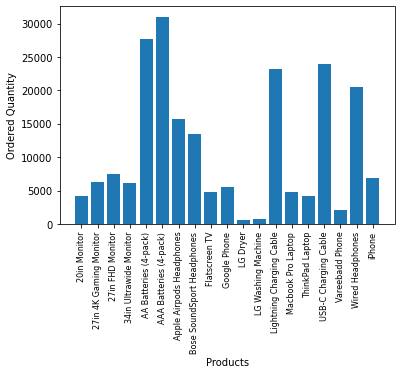

In [173]:
# Here we are displaying a Bar Graph of Products v Ordered Quantity

keys = [pair for pair, df in product_group]  #keys = product_group
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Ordered Quantity')
plt.xlabel('Products')
plt.show()

Hence we can conclude AAA Batteries is the product which sold the most

#ANSWERS

1. The best month for sales was December and money earned was 4.6 million $
2. San Francisco is the city that sold the most products
3. 1 PM and 8 PM are best times for targeting adds to customers to maximize likelihood of customer's buying product
4. iPhone and Lightning Charging Cable are the products which are most often sold together
5. AAA Batteries is the product which sold the most